<a href="https://colab.research.google.com/github/Aldoptma0704/Image-Feature-Extraction/blob/main/Texture_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GLCM (Gray Level Co-occurrence Matrix)

Contrast:
 [[0.00929234 0.01394967 0.00859007 0.01387265]
 [0.01681454 0.01394967 0.01559163 0.01387265]
 [0.02113068 0.0218465  0.01986151 0.02153543]]
Homogeneity:
 [[0.99535383 0.99302516 0.99570496 0.99306368]
 [0.99159273 0.99302516 0.99220419 0.99306368]
 [0.98943466 0.98907675 0.99006925 0.98923229]]
Energy:
 [[0.96335837 0.96104301 0.96374913 0.9610819 ]
 [0.95956493 0.96104301 0.96024642 0.9610819 ]
 [0.9574221  0.95713847 0.95815967 0.95729366]]
Correlation:
 [[0.85187867 0.7773086  0.86293454 0.77853861]
 [0.73183976 0.7773086  0.75084603 0.77853861]
 [0.66276563 0.65054947 0.68202769 0.65552788]]


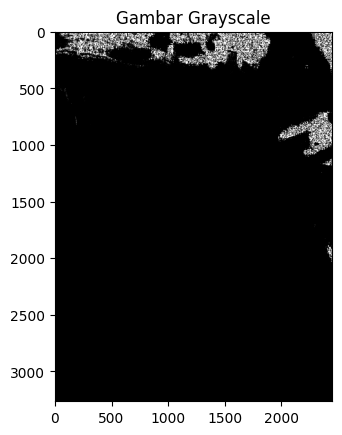

In [8]:
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.io import imread
from skimage.color import rgb2gray

# Baca gambar dan ubah ke grayscale
image = imread('Output/6.jpg')
gray_image = rgb2gray(image).astype(int)

# Buat GLCM
distances = [1, 2, 3]  # Jarak antar piksel
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut
glcm = graycomatrix(gray_image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Hitung properti GLCM
contrast = graycoprops(glcm, 'contrast')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

print('Contrast:\n', contrast)
print('Homogeneity:\n', homogeneity)
print('Energy:\n', energy)
print('Correlation:\n', correlation)

# Tampilkan gambar asli
plt.imshow(gray_image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()


#Local Binary Patterns (LBP)

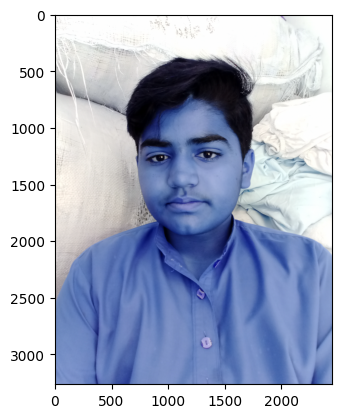

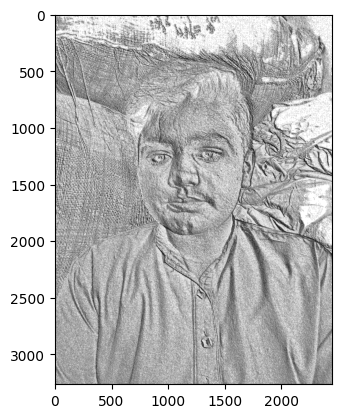

LBP Program is finished


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def get_pixel(img, center, x, y):

	new_value = 0

	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1

	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []

	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))

	# top
	val_ar.append(get_pixel(img, center, x-1, y))

	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	# right
	val_ar.append(get_pixel(img, center, x, y + 1))

	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))

	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))

	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))

	# left
	val_ar.append(get_pixel(img, center, x, y-1))

	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0

	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]

	return val

path = 'Output/6.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")


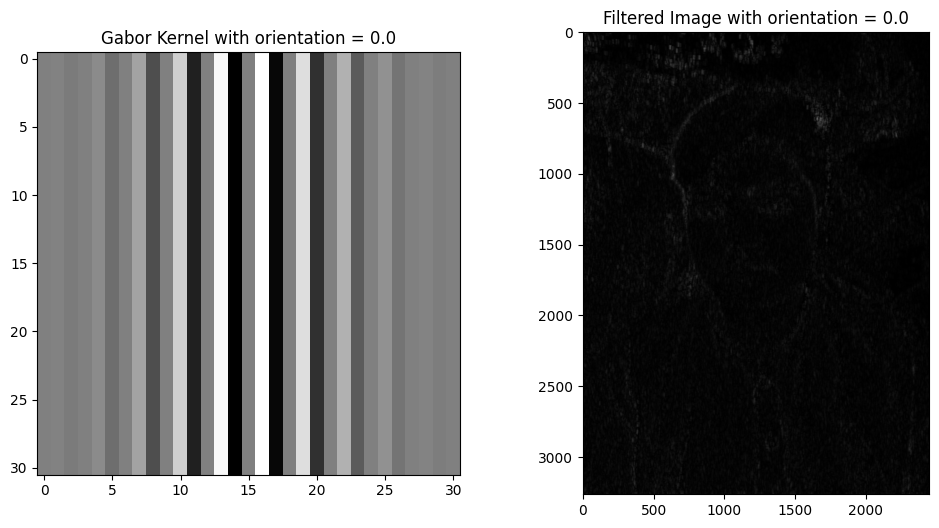

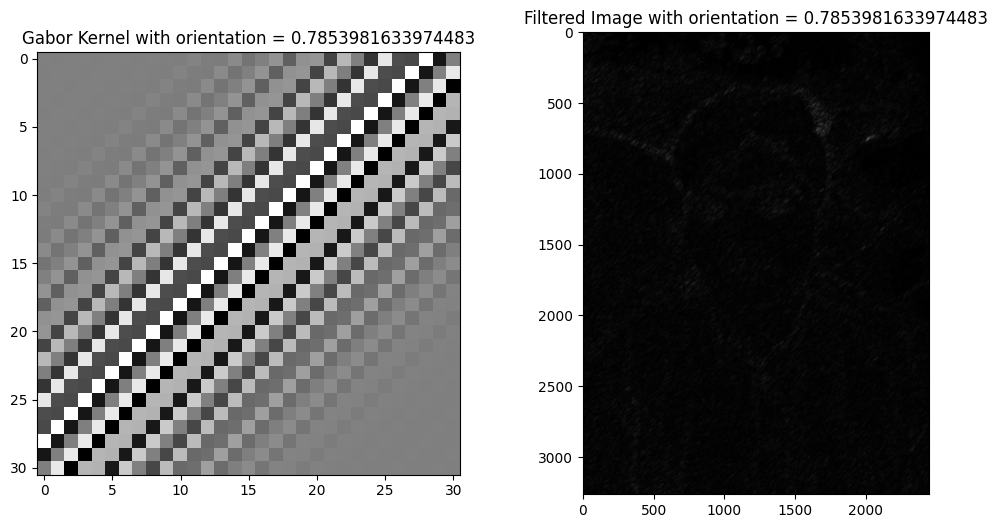

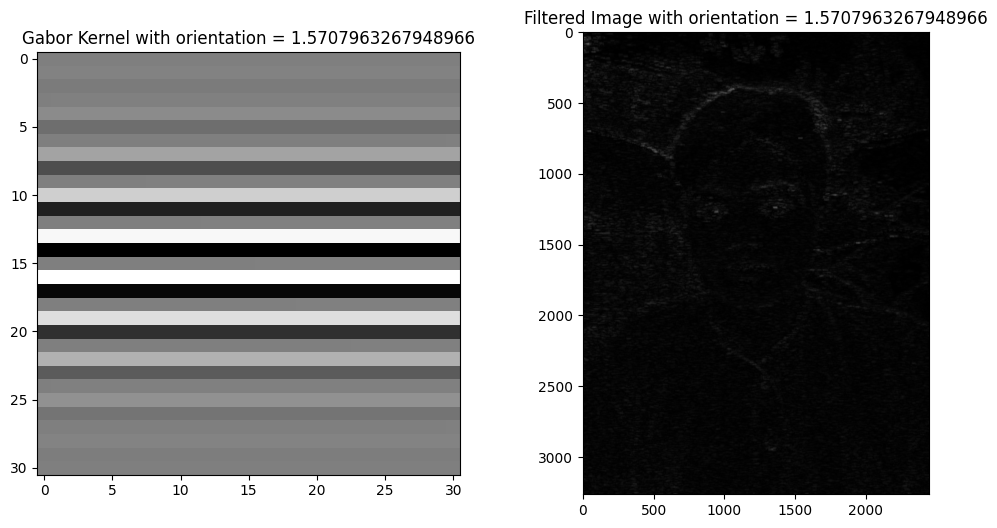

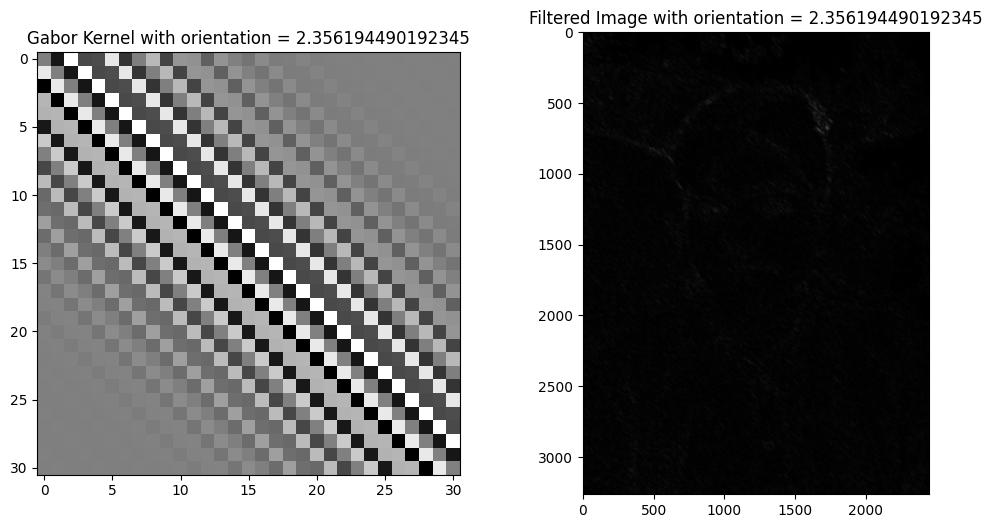

In [12]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv2.imread('Output/6.jpg', cv2.IMREAD_GRAYSCALE)

# Kernel size
ksize = 31

# Sigma for Gaussian envelope
sigma = 5
# Range of orientation values
theta_range = np.arange(0, np.pi, np.pi / 4)
# Frequency of sinusoidal wave
frequency = 0.3
# Phase of sinusoidal wave
phase = 0

# Loop for generating different rotations and applying Gabor filters
for theta in theta_range:
    # Generate Gabor kernel
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, frequency, phase)

    # Apply Gabor filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    # Plot the Gabor kernel
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(kernel, cmap='gray')
    plt.title("Gabor Kernel with orientation = " + str(theta))

    # Plot the filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image with orientation = " + str(theta))

    plt.show()
